# **Data Acquisition**

---



In [2]:
!pip install gdown


In [84]:
import gdown

file_id = '17wPwub2aqxPOcourujq_cNBqb54HShVT'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'crime_data.csv'

gdown.download(url, output, quiet=False)

import pandas as pd
data = pd.read_csv(output)


Downloading...
From: https://drive.google.com/uc?id=17wPwub2aqxPOcourujq_cNBqb54HShVT
To: /content/crime_data.csv
100%|██████████| 211M/211M [00:02<00:00, 77.6MB/s]


In [85]:

file_id = '1l4DPJCeI8hCZFyA9gZpLrcuROHTBGpXd'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'economical_data.csv'

gdown.download(url, output, quiet=False)
economical_data = pd.read_csv(output)


Downloading...
From: https://drive.google.com/uc?id=1l4DPJCeI8hCZFyA9gZpLrcuROHTBGpXd
To: /content/economical_data.csv
100%|██████████| 1.66k/1.66k [00:00<00:00, 6.08MB/s]


In [87]:
num_rows = data.shape[0]
num_cols = data.shape[1]

print(f'No of rows are {num_rows} and No of columns are {num_cols}')

No of rows are 825212 and No of columns are 28


# **Data Inspection**

---



Display the first few rows of the dataset.

In [88]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


Check the data types of each column

In [89]:
data_types = data.dtypes
print(data_types)
data.info()


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825212 entries, 0 to 825211
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           825212 non-null  int64  
 1   Date

Review column names and descriptions, if available

In [90]:
column_descriptions = {
    'DR_NO'         : 'Report Number - A unique identifier for each crime report.',
    'Date Rptd'     : 'Date Reported - The date when the crime was reported.',
    'DATE OCC'      : 'Date Occurred - The date when the crime occurred.',
    'TIME OCC'      : 'Time Occurred - The time when the crime occurred.',
    'AREA'          : 'Numeric code representing the geographic area where the crime occurred.',
    'AREA NAME'     : 'Name of the geographic area where the crime occurred.',
    'Rpt Dist No'   : 'Report District Number - A numeric code associated with the report district.',
    'Part 1-2'      : 'Indicator of the type of crime, with "1" representing Part I crimes and "2" representing Part II crimes.',
    'Crm Cd'        : 'Crime Code - A numeric code representing the type of crime.',
    'Crm Cd Desc'   : 'Crime Code Description - A description of the type of crime.',
    'Mocodes'       : 'Modus Operandi Codes - Codes representing the methods used in the crime.',
    'Vict Age'      : 'Age of the victim.',
    'Vict Sex'      : 'Sex of the victim.',
    'Vict Descent'  : 'Descent of the victim.',
    'Premis Cd'     : 'Premises Code - A numeric code representing the type of location where the crime occurred.',
    'Premis Desc'   : 'Premises Description - A description of the location where the crime occurred.',
    'Weapon Used Cd': 'Code or identifier for the type of weapon used in the crime',
    'Weapon Desc'   : 'Description of the weapon used in the crime',
    'Status'        : 'Status of the crime report',
    'Status Desc'   : 'Description of the status',
    'Crm Cd 1'      : 'Primary crime code',
    'Crm Cd 2'      : 'Secondary crime code',
    'Crm Cd 3'      : 'Tertiary crime code',
    'Crm Cd 4'      : 'Quaternary crime code',
    'LOCATION'      : 'Location where the crime occurred',
    'Cross Street'  : 'Name of the cross street or intersection where the crime took place',
    'LAT'           : 'Latitude coordinates of the crime location',
    'LON'           : 'Longitude coordinates of the crime location'
}


for column, description in column_descriptions.items():
    print(f'{column}: {description}')

DR_NO: Report Number - A unique identifier for each crime report.
Date Rptd: Date Reported - The date when the crime was reported.
DATE OCC: Date Occurred - The date when the crime occurred.
TIME OCC: Time Occurred - The time when the crime occurred.
AREA: Numeric code representing the geographic area where the crime occurred.
AREA NAME: Name of the geographic area where the crime occurred.
Rpt Dist No: Report District Number - A numeric code associated with the report district.
Part 1-2: Indicator of the type of crime, with "1" representing Part I crimes and "2" representing Part II crimes.
Crm Cd: Crime Code - A numeric code representing the type of crime.
Crm Cd Desc: Crime Code Description - A description of the type of crime.
Mocodes: Modus Operandi Codes - Codes representing the methods used in the crime.
Vict Age: Age of the victim.
Vict Sex: Sex of the victim.
Vict Descent: Descent of the victim.
Premis Cd: Premises Code - A numeric code representing the type of location where 

In [91]:

columns_new = {
    'DR_NO'         : 'DR_NO',
    'Date Rptd'     : 'Date_Rptd',
    'DATE OCC'      : 'DATE_OCC',
    'TIME OCC'      : 'TIME_OCC',
    'AREA NAME'     : 'AREA_NAME',
    'Rpt Dist No'   : 'Rpt_Dist_No',
    'Part 1-2'      : 'Part_1_2',
    'Crm Cd'        : 'Crm_Cd',
    'Crm Cd Desc'   : 'Crm_Cd_Desc',
    'Vict Age'      : 'Vict_Age',
    'Vict Sex'      : 'Vict_Sex',
    'Vict Descent'  : 'Vict_Descent',
    'Premis Cd'     : 'Premis_Cd',
    'Premis Desc'   : 'Premis_Desc',
    'Code or identifier for the type of weapon used in the crime': 'Weapon_Used_Cd',
    'Weapon Desc'   : 'Weapon_Desc',
    'Status Desc'   : 'Status_Desc',
    'Crm Cd 1'      : 'Crm_Cd1',
    'Crm Cd 2'      : 'Crm_Cd2',
    'Crm Cd 3'      : 'Crm_Cd3',
    'Crm Cd 4'      : 'Crm_Cd4',
    'Cross Street'  : 'Cross_Street'
}

data = data.rename(columns=columns_new)
print(data)


            DR_NO               Date_Rptd                DATE_OCC  TIME_OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
825207  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
825208  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
825209  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
825210  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
825211  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA_NAME  Rpt_Dist_No  Part_1_2  C

# **Data Cleaning**

---



In [92]:
data.isnull().sum()

DR_NO                  0
Date_Rptd              0
DATE_OCC               0
TIME_OCC               0
AREA                   0
AREA_NAME              0
Rpt_Dist_No            0
Part_1_2               0
Crm_Cd                 0
Crm_Cd_Desc            0
Mocodes           114148
Vict_Age               0
Vict_Sex          108529
Vict_Descent      108537
Premis_Cd             10
Premis_Desc          488
Weapon Used Cd    537498
Weapon_Desc       537498
Status                 0
Status_Desc            0
Crm_Cd1               10
Crm_Cd2           764505
Crm_Cd3           823173
Crm_Cd4           825151
LOCATION               0
Cross_Street      693343
LAT                    0
LON                    0
dtype: int64

Identify and handle missing data appropriately.

In [93]:
data['Vict_Sex'].fillna(data['Vict_Sex'].mode().iloc[0],inplace=True)
data['Vict_Descent'].fillna(data['Vict_Descent'].mode().iloc[0],inplace=True)

In [94]:
data['Weapon Used Cd']=data['Weapon Used Cd'].fillna(int(000))
data['Weapon_Desc']=data['Weapon_Desc'].fillna(str("No weapons involved"))

In [95]:
data = data.drop(columns=['Crm_Cd2','Crm_Cd3','Crm_Cd4','Mocodes'])

In [96]:
data['LOCATION'] = data['LOCATION'].astype(str) + data['Cross_Street'].astype(str)
data['LOCATION'] = data['LOCATION'].str.replace(r'nan$', '', regex=True)
data['LOCATION'] = data['LOCATION'].str.replace(r'\s+', ' ', regex=True)
data['LOCATION']

0            1100 W 39TH PL
1             700 S HILL ST
2              200 E 6TH ST
3           5400 CORTEEN PL
4            14400 TITUS ST
                ...        
825207    12500 BRANFORD ST
825208     12800 FILMORE ST
825209    6100 S VERMONT AV
825210        500 S MAIN ST
825211    14500 HARTLAND ST
Name: LOCATION, Length: 825212, dtype: object

In [97]:
data = data.drop(columns=['Cross_Street'])

In [98]:
data.isnull().sum()

DR_NO               0
Date_Rptd           0
DATE_OCC            0
TIME_OCC            0
AREA                0
AREA_NAME           0
Rpt_Dist_No         0
Part_1_2            0
Crm_Cd              0
Crm_Cd_Desc         0
Vict_Age            0
Vict_Sex            0
Vict_Descent        0
Premis_Cd          10
Premis_Desc       488
Weapon Used Cd      0
Weapon_Desc         0
Status              0
Status_Desc         0
Crm_Cd1            10
LOCATION            0
LAT                 0
LON                 0
dtype: int64

In [99]:
data = data.dropna()

In [100]:
#CONVERTING COLUMNS DATATPYE
columns_to_convert = ['Crm_Cd1']
data[columns_to_convert] = data[columns_to_convert].fillna(0).astype(int)

data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])

print(data.dtypes)


DR_NO                      int64
Date_Rptd                 object
DATE_OCC          datetime64[ns]
TIME_OCC                   int64
AREA                       int64
AREA_NAME                 object
Rpt_Dist_No                int64
Part_1_2                   int64
Crm_Cd                     int64
Crm_Cd_Desc               object
Vict_Age                   int64
Vict_Sex                  object
Vict_Descent              object
Premis_Cd                float64
Premis_Desc               object
Weapon Used Cd           float64
Weapon_Desc               object
Status                    object
Status_Desc               object
Crm_Cd1                    int64
LOCATION                  object
LAT                      float64
LON                      float64
dtype: object


In [101]:
#DROP DUPLICATE ROWS
data.drop_duplicates(subset='DR_NO', keep='first', inplace=True)


print(data.shape)


(824714, 23)


In [102]:
#HANDLING NULL DATA

data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824714 entries, 0 to 825211
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           824714 non-null  int64         
 1   Date_Rptd       824714 non-null  object        
 2   DATE_OCC        824714 non-null  datetime64[ns]
 3   TIME_OCC        824714 non-null  int64         
 4   AREA            824714 non-null  int64         
 5   AREA_NAME       824714 non-null  object        
 6   Rpt_Dist_No     824714 non-null  int64         
 7   Part_1_2        824714 non-null  int64         
 8   Crm_Cd          824714 non-null  int64         
 9   Crm_Cd_Desc     824714 non-null  object        
 10  Vict_Age        824714 non-null  int64         
 11  Vict_Sex        824714 non-null  object        
 12  Vict_Descent    824714 non-null  object        
 13  Premis_Cd       824714 non-null  float64       
 14  Premis_Desc     824714 non-null  obj

In [229]:
#DROPPING DATA WHERE LOCATION IS NOT IN LOS ANGELES
data = data[(data['LAT'] != 0) & (data['LON'] != 0)]


In [243]:
#DROPPING DATA WHERE VICTIM SEX IS NOT MENTIONED
data = data[data['Vict_Sex']!='-']

In [103]:
data['Status'] = data['Status'].astype('category')
# Use cat.codes to get the numerical encoding
data['Status_category_encoded'] = data['Status'].cat.codes

data['Status_category_encoded']

0         1
1         3
2         0
3         3
4         3
         ..
825207    3
825208    3
825209    3
825210    3
825211    3
Name: Status_category_encoded, Length: 824714, dtype: int8

In [104]:
data['Vict_Sex'] = data['Vict_Sex'].astype('category')
# Use cat.codes to get the numerical encoding
data['Vict_Sex_category_encoded'] = data['Vict_Sex'].cat.codes


data['Vict_Descent'] = data['Vict_Descent'].astype('category')
# Use cat.codes to get the numerical encoding
data['Vict_Descent_category_encoded'] = data['Vict_Descent'].cat.codes
data['Vict_Sex_category_encoded']
data['Vict_Descent_category_encoded']


0          2
1          7
2         18
3         17
4         18
          ..
825207     7
825208     7
825209     2
825210     7
825211     7
Name: Vict_Descent_category_encoded, Length: 824714, dtype: int8

In [105]:
print(data.columns)

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age',
       'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon Used Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd1',
       'LOCATION', 'LAT', 'LON', 'Status_category_encoded',
       'Vict_Sex_category_encoded', 'Vict_Descent_category_encoded'],
      dtype='object')


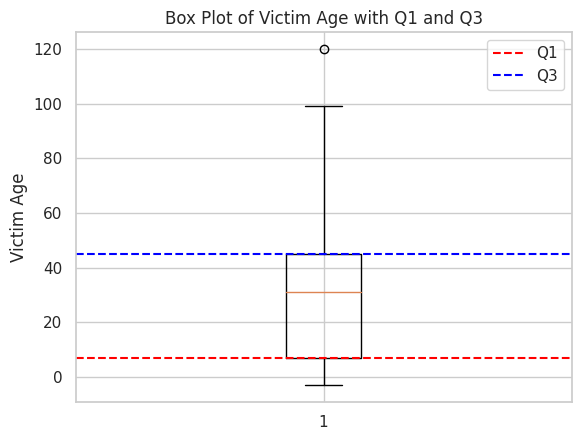

           DR_NO               Date_Rptd   DATE_OCC  TIME_OCC  AREA AREA_NAME  \
99893  200808494  04/19/2020 12:00:00 AM 2020-04-19      2145     8   West LA   

       Rpt_Dist_No  Part_1_2  Crm_Cd  \
99893          889         1     230   

                                          Crm_Cd_Desc  ...  \
99893  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...   

                 Weapon_Desc Status  Status_Desc  Crm_Cd1           LOCATION  \
99893  SEMI-AUTOMATIC PISTOL     IC  Invest Cont      230  2000 S BEDFORD ST   

           LAT       LON Status_category_encoded Vict_Sex_category_encoded  \
99893  34.0416 -118.3836                       3                         3   

       Vict_Descent_category_encoded  
99893                              7  

[1 rows x 26 columns]


In [106]:
import matplotlib.pyplot as plt

plt.boxplot(data['Vict_Age'], vert=True)

q1 = data['Vict_Age'].quantile(0.25)
q3 = data['Vict_Age'].quantile(0.75)
IQR = q3 - q1

plt.axhline(q1, color='red', linestyle='--', label='Q1')
plt.axhline(q3, color='blue', linestyle='--', label='Q3')

plt.ylabel('Victim Age')
plt.title('Box Plot of Victim Age with Q1 and Q3')

plt.legend()
plt.show()

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = data[(data['Vict_Age'] < lower_bound) | (data['Vict_Age'] > upper_bound)]
print(outliers)



## **Exploratory Data Analysis (EDA)**
---



### **OVERALL CRIME PER YEAR**


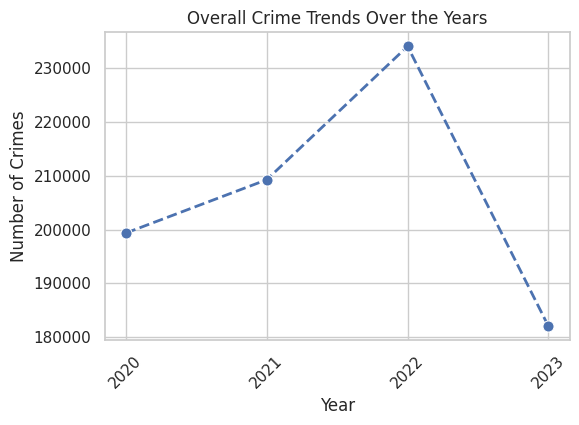

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

crime_by_year = data['DATE_OCC'].dt.year.value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

sns.lineplot(x=crime_by_year.index, y=crime_by_year.values, marker='o', color='b', markersize=8, linewidth=2, linestyle='--' )

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Overall Crime Trends Over the Years')

plt.xticks(crime_by_year.index, rotation=45)

plt.show()


### **SEASONAL CRIME DATA**


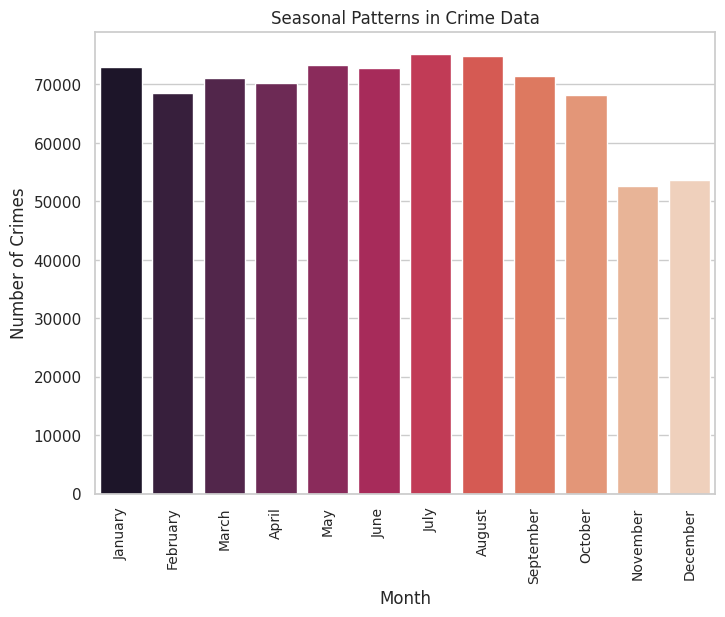

In [108]:

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

data['Month'] = data['DATE_OCC'].dt.month.map(month_names)

monthly_crime = data.groupby('Month')['DR_NO'].count()
monthly_crime = monthly_crime.reindex(month_names.values())

plt.figure(figsize=(8,6))
sns.barplot( x=monthly_crime.index, y=monthly_crime , palette='rocket')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90, fontsize=10)
plt.title('Seasonal Patterns in Crime Data')
plt.show()

### **MONTHLY CRIME OVER YEARS**


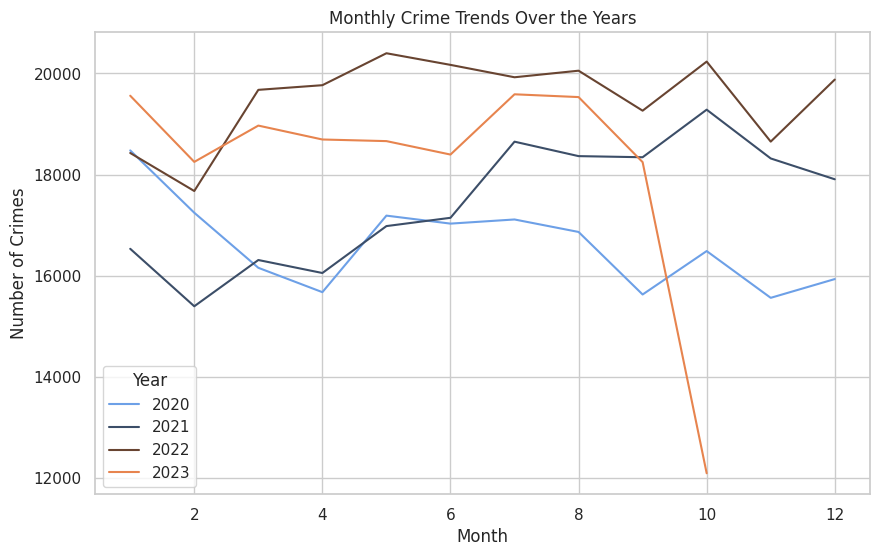

In [109]:

data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])

data['Year'] = data['DATE_OCC'].dt.year
data['Month'] = data['DATE_OCC'].dt.month
monthly_counts = data.groupby(['Year', 'Month']).size()

monthly_counts = monthly_counts.reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='Month', y='Count', hue='Year', palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Trends Over the Years')

plt.show()



### **INVESTING ANY IMPACT OF GLOBAL EVENTS OR CRIME LAWS**


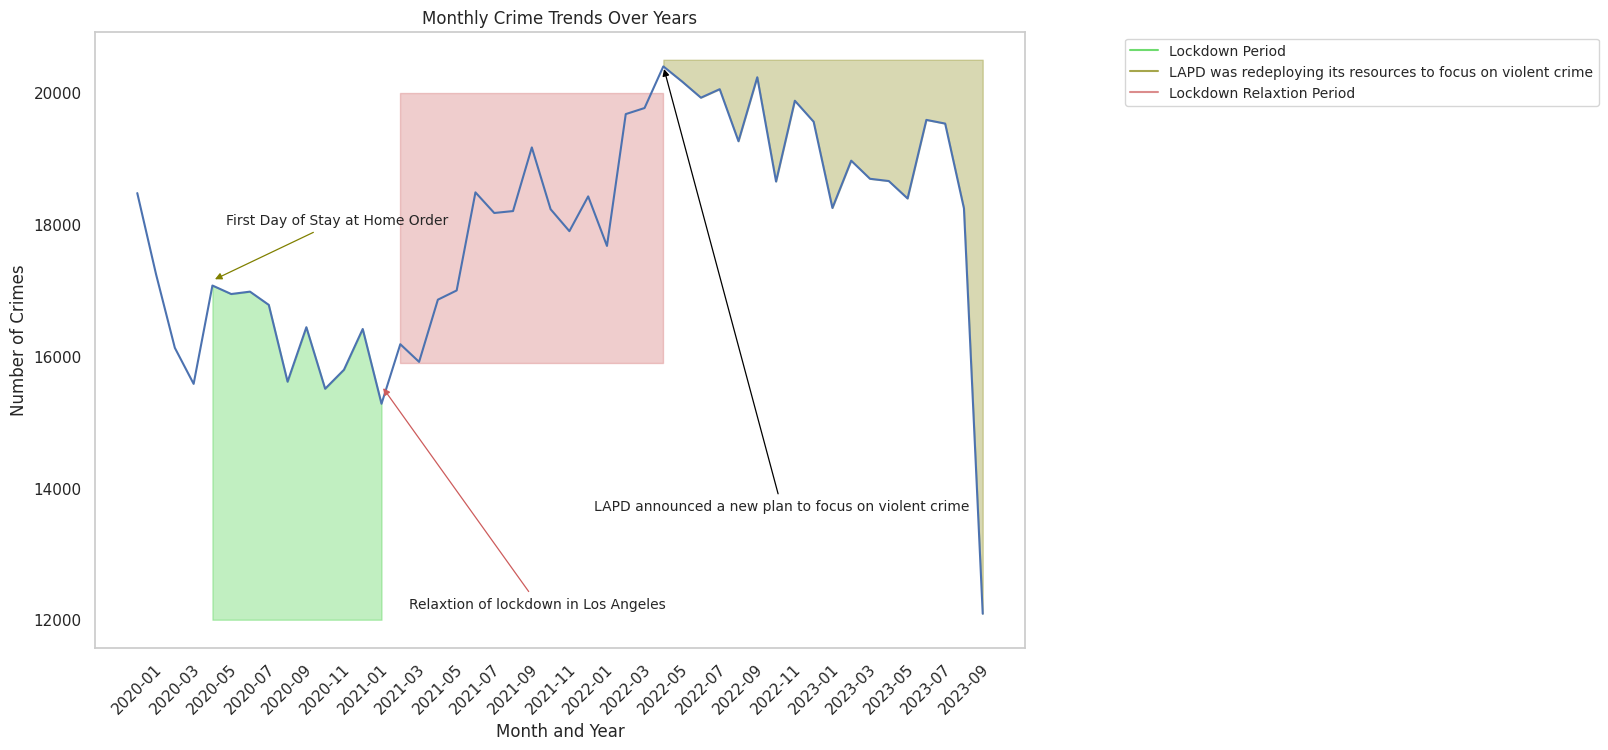

In [334]:
from matplotlib.lines import Line2D

data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])

monthly_counts = data.groupby([data['DATE_OCC'].dt.year, data['DATE_OCC'].dt.month]).size()

plt.figure(figsize=(12,8))
monthly_counts.plot(kind='line')

xtick_labels = [f'{year}-{month:02}' for year, month in monthly_counts.index]
plt.xticks(range(0, len(xtick_labels), 2), xtick_labels[::2], rotation=45)

lockdown_date = '2020-05'
lockdown_label = 'First Day of Stay at Home Order'

lockdown_relaxation_date = '2021-02'
lockdown_relaxation_label = 'Relaxtion of lockdown in Los Angeles'

LAPD_date = '2022-05'
PRESENT_date = '2023-10'

LAPD_date = '2022-05'
LAPD_label = 'LAPD announced a new plan to focus on violent crime'

plt.annotate(lockdown_label, xy=(xtick_labels.index(lockdown_date), 17150), xytext=(10, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', lw=0.9, color='olive'), fontsize=10)
plt.annotate(lockdown_relaxation_label, xy=(xtick_labels.index(lockdown_relaxation_date), 15550), xytext=(20, -160),
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', lw=0.9, color='indianred'), fontsize=10)
plt.annotate(LAPD_label, xy=(xtick_labels.index(LAPD_date), 20400), xytext=(-50, -320),
             textcoords='offset points', arrowprops=dict(arrowstyle='-|>', lw=0.9, color='black'), fontsize=10)


lockdown_index = xtick_labels.index(lockdown_date)
relaxation_index = xtick_labels.index(lockdown_relaxation_date)
plt.fill_between(range(lockdown_index, relaxation_index + 1), 12000, monthly_counts.values[lockdown_index:relaxation_index + 1], color='limegreen', alpha=0.3)

LAPD_index = xtick_labels.index(LAPD_date)
PRESENT_index = xtick_labels.index(PRESENT_date)
plt.fill_between(range(LAPD_index, PRESENT_index + 1), 20500, monthly_counts.values[LAPD_index:PRESENT_index + 1], color='olive', alpha=0.3)

UP_index = xtick_labels.index(lockdown_relaxation_date)
PEAK_index = xtick_labels.index(LAPD_date)
plt.fill_between(range(UP_index+1, PEAK_index+1), 15900, 20000, color='indianred', alpha=0.3)




legend_elements = [
    Line2D([0], [0], color='limegreen', alpha=0.7, label='Lockdown Period'),
    Line2D([0], [0], color='olive', alpha=0.7, label='LAPD was redeploying its resources to focus on violent crime'),
    Line2D([0], [0], color='indianred', alpha=0.7, label='Lockdown Relaxtion Period')
]

plt.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.1, 1), fontsize='small')

plt.grid(False)
plt.xlabel('Month and Year')
plt.ylabel('Number of Crimes')
plt.title('Analysis of Monthly Crime Trends With Global Impact')

plt.show()



### **CRIME BY AREA**


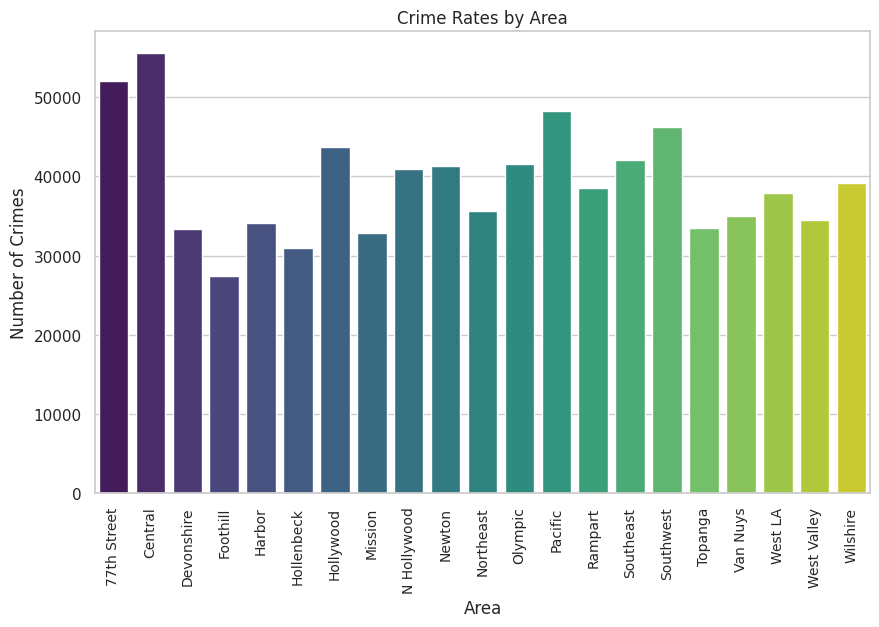

In [111]:

crime_by_area = data.groupby('AREA_NAME')['DR_NO'].count()

plt.figure(figsize=(10,6))
sns.barplot(x=crime_by_area.index, y=crime_by_area.values, palette="viridis")
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90, fontsize=10)
plt.title('Crime Rates by Area')
plt.show()


### **TOP 5 CRIMES FOR EACH AREA**

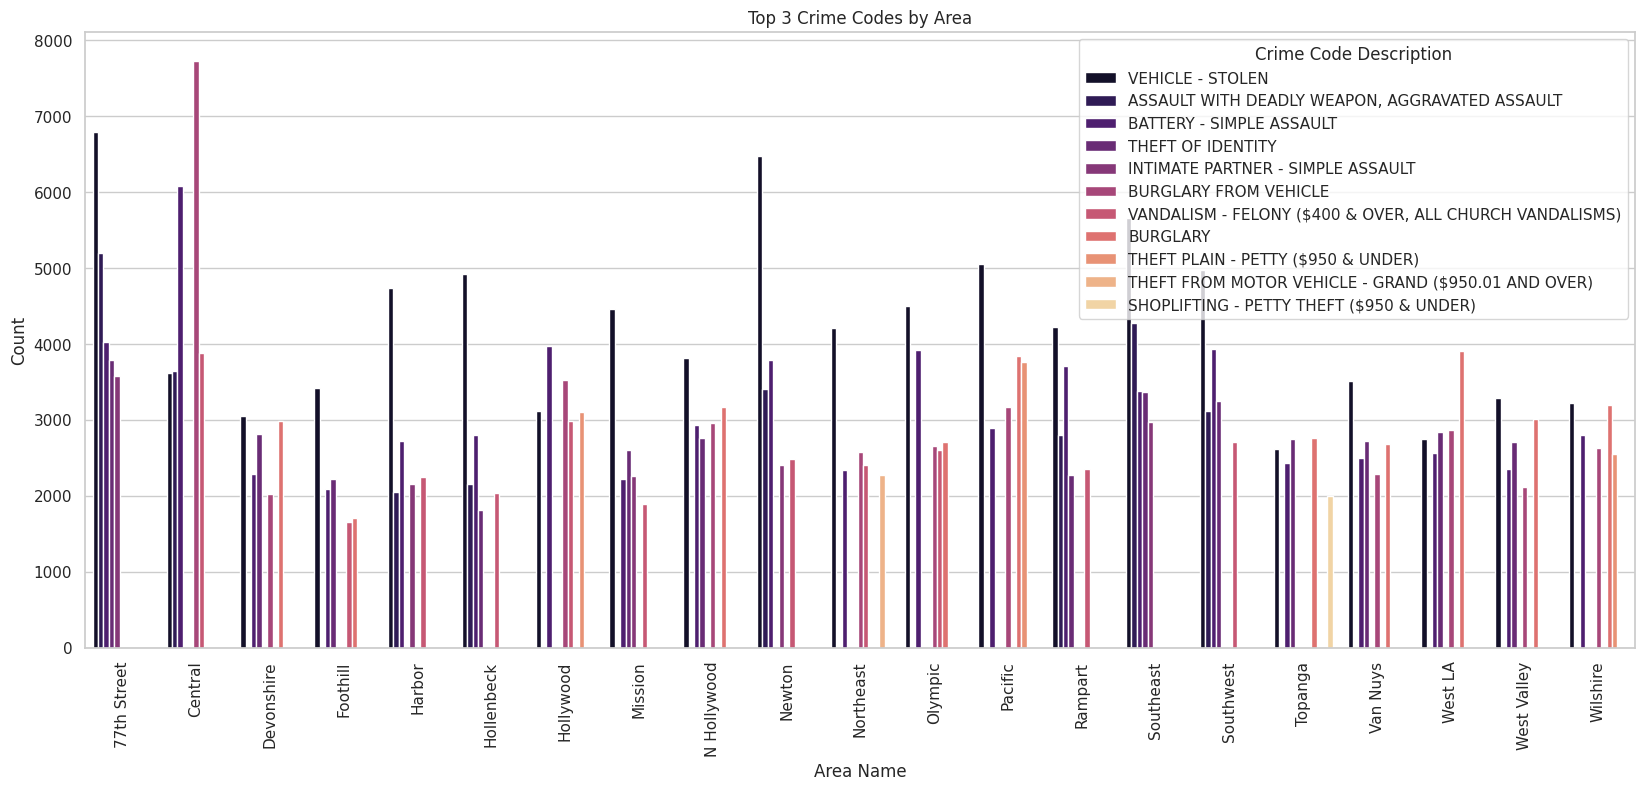

In [112]:
crime_by_area = data.groupby(['AREA_NAME', 'Crm_Cd_Desc'])['DR_NO'].count().reset_index(name='Count')

crime_by_area = crime_by_area.sort_values(by=['AREA_NAME', 'Count'], ascending=[True, False])

top_3_crimes_by_area = crime_by_area.groupby('AREA_NAME').head(5)

plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")

sns.barplot( data=top_3_crimes_by_area, x='AREA_NAME', y='Count', hue='Crm_Cd_Desc', palette='magma',order = top_3_crimes_by_area['AREA_NAME'].unique())
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.title('Top 3 Crimes by Area')
plt.legend(title='Crime Code Description', loc='upper right')

plt.xticks(rotation=90)

plt.show()

### **MOST COMMON CRIME**


In [113]:

crime_type_counts = data['Crm_Cd_Desc'].value_counts()

most_common_crime = crime_type_counts.idxmax()
most_common_crime_count = crime_type_counts.max()


print(f"The most common crime type is '{most_common_crime}' with {most_common_crime_count} occurrences")


The most common crime type is 'VEHICLE - STOLEN' with 88353 occurrences


(array([18262, 18628, 18993, 19358, 19653]),
 [Text(18262, 0, 'Jan\n2020'),
  Text(18628, 0, 'Jan\n2021'),
  Text(18993, 0, 'Jan\n2022'),
  Text(19358, 0, 'Jan\n2023'),
  Text(19653, 0, '')])

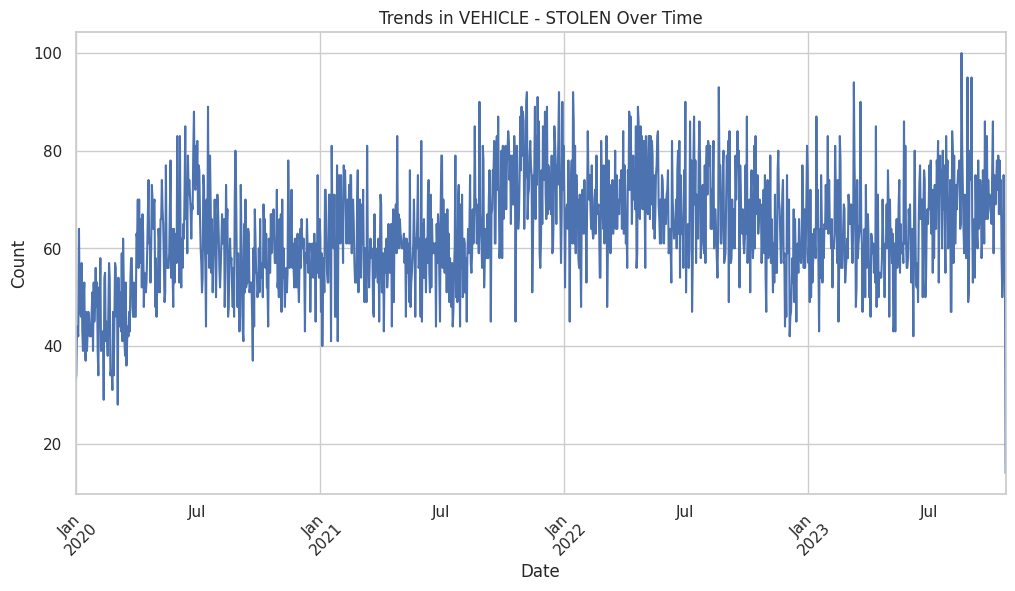

In [114]:
crime_type_count = data.groupby(['DATE_OCC', 'Crm_Cd_Desc'])['DR_NO'].count().unstack(fill_value=0)

crime_type_count[most_common_crime].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'Trends in {most_common_crime} Over Time')
plt.xticks(rotation=45)

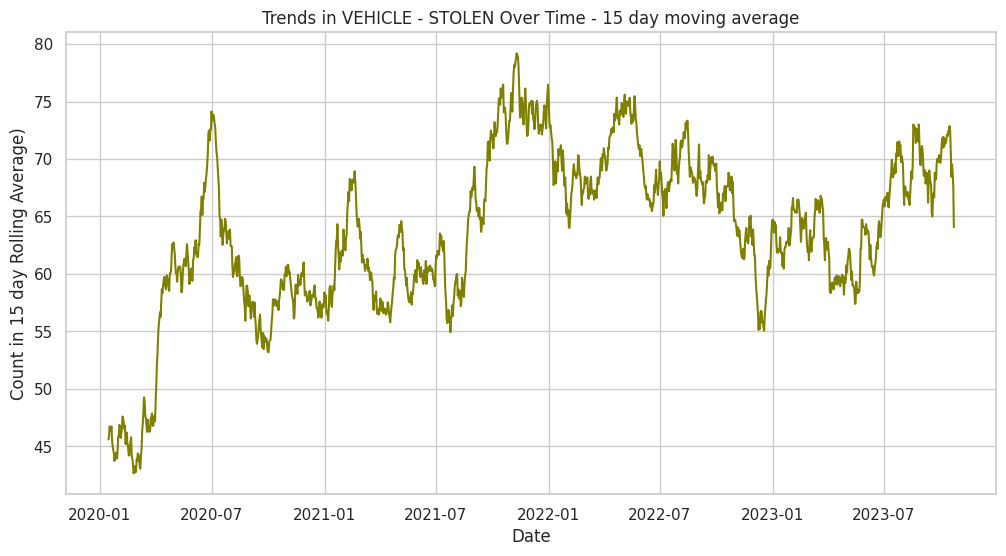

In [115]:
#PLOTTING 15 DAY MOVING AVERAGE TO REDUCE FLUCTUATION

crime_type_count = data.groupby(['DATE_OCC', 'Crm_Cd_Desc'])['DR_NO'].count().unstack(fill_value=0)

most_common_crime_data = crime_type_count[most_common_crime]

rolling_mean = most_common_crime_data.rolling(window=15).mean()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=rolling_mean, dashes=False,  legend=False, color='olive')

plt.xlabel('Date')
plt.ylabel('Count in 15 day Rolling Average)')
plt.title(f'Trends in {most_common_crime} Over Time - 15 day moving average')



plt.show()


### **CRIME BY DAY OF THE WEEK**


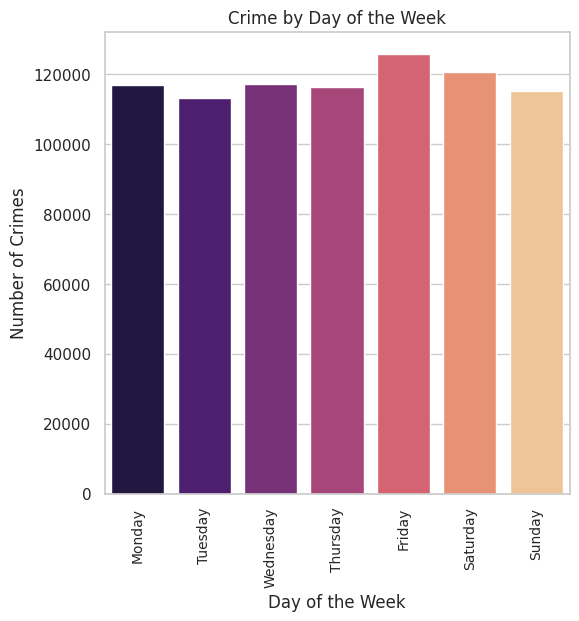

In [116]:

data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])
data['Day_of_Week'] = data['DATE_OCC'].dt.day_name()
crime_by_day = data.groupby('Day_of_Week')['DR_NO'].count()
crime_by_day = crime_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(6,6))
sns.barplot(x=crime_by_day.index, y=crime_by_day, palette='magma')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90, fontsize=10)
plt.title('Crime by Day of the Week')
plt.show()



### **CRIME COUNT DISTRIBUTION FOR TOP 10 CRIMES ON EACH DAY OF THE WEEK**

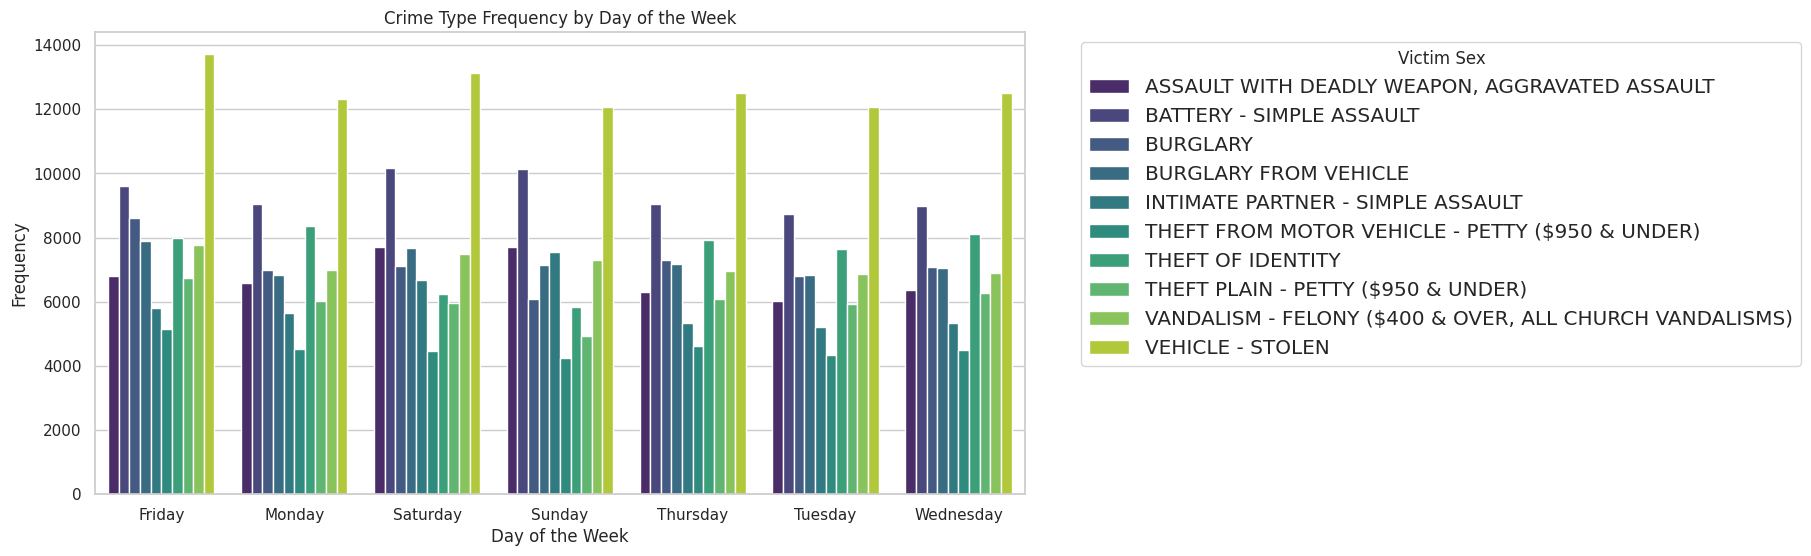

In [200]:
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])
data['Day_of_Week'] = data['DATE_OCC'].dt.strftime('%A')

top_10_crimes = data['Crm_Cd_Desc'].value_counts().head(10).index
crime_count_week = data[data['Crm_Cd_Desc'].isin(top_10_crimes)].groupby(['Day_of_Week', 'Crm_Cd_Desc'])['DR_NO'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Day_of_Week', y='DR_NO', hue='Crm_Cd_Desc', data=crime_count_week, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Crime Type Frequency by Day of the Week')
plt.legend(title='Victim Sex', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
plt.show()


## **Analyzing to identify any patterns or correlations between :demographic factors specific types of crimes**


### **DISTRIBUTION OF VICTIM SEX FOR TOP 10 CRIMES**

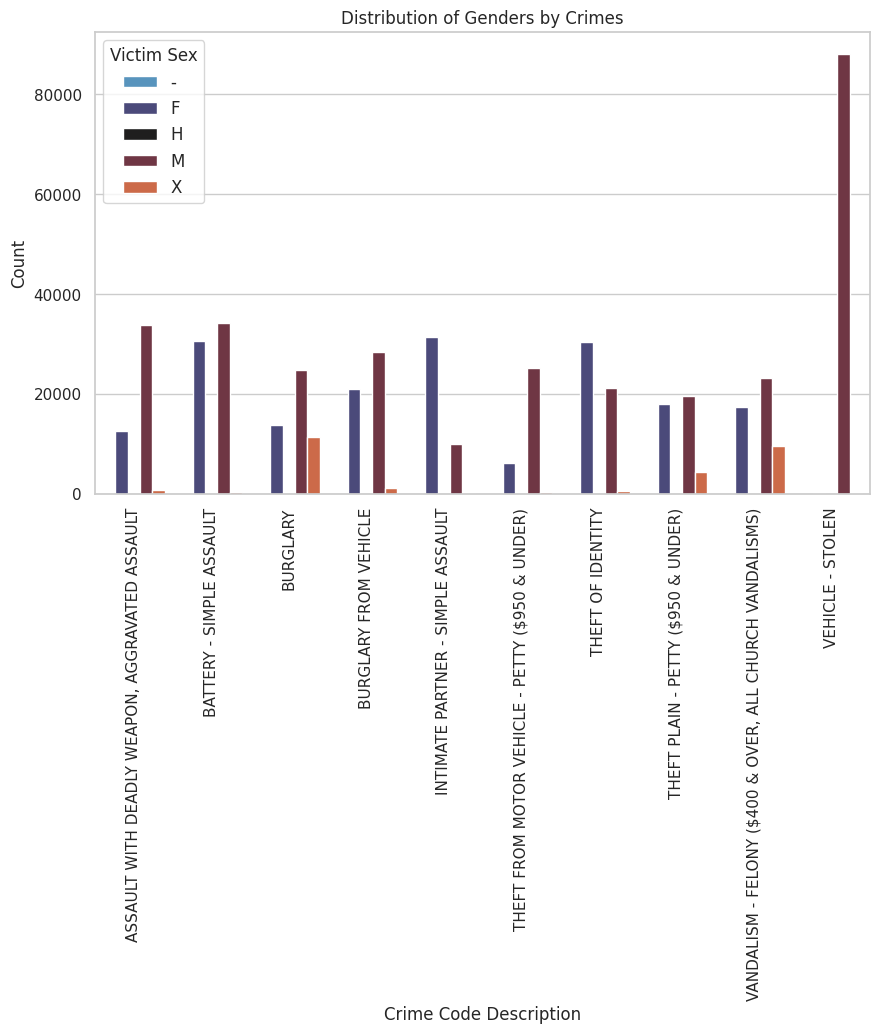

In [244]:
grouped_data = data.groupby(['Crm_Cd_Desc', 'Vict_Sex'])['DR_NO'].count().reset_index(name='Count')
top_10_crime = grouped_data.groupby('Crm_Cd_Desc')['Count'].sum().sort_values(ascending=False).head(10).index
filtered_data = grouped_data[grouped_data['Crm_Cd_Desc'].isin(top_10_crime)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Crm_Cd_Desc', y='Count', hue='Vict_Sex', data=filtered_data, palette='icefire')
plt.xticks(rotation=90)
plt.title('Distribution of Genders by Crimes')
plt.xlabel('Crime Code Description')
plt.ylabel('Count')
plt.legend(title='Victim Sex', fontsize='medium')
plt.show()


### **Age Distribution for Top 20 Crimes**

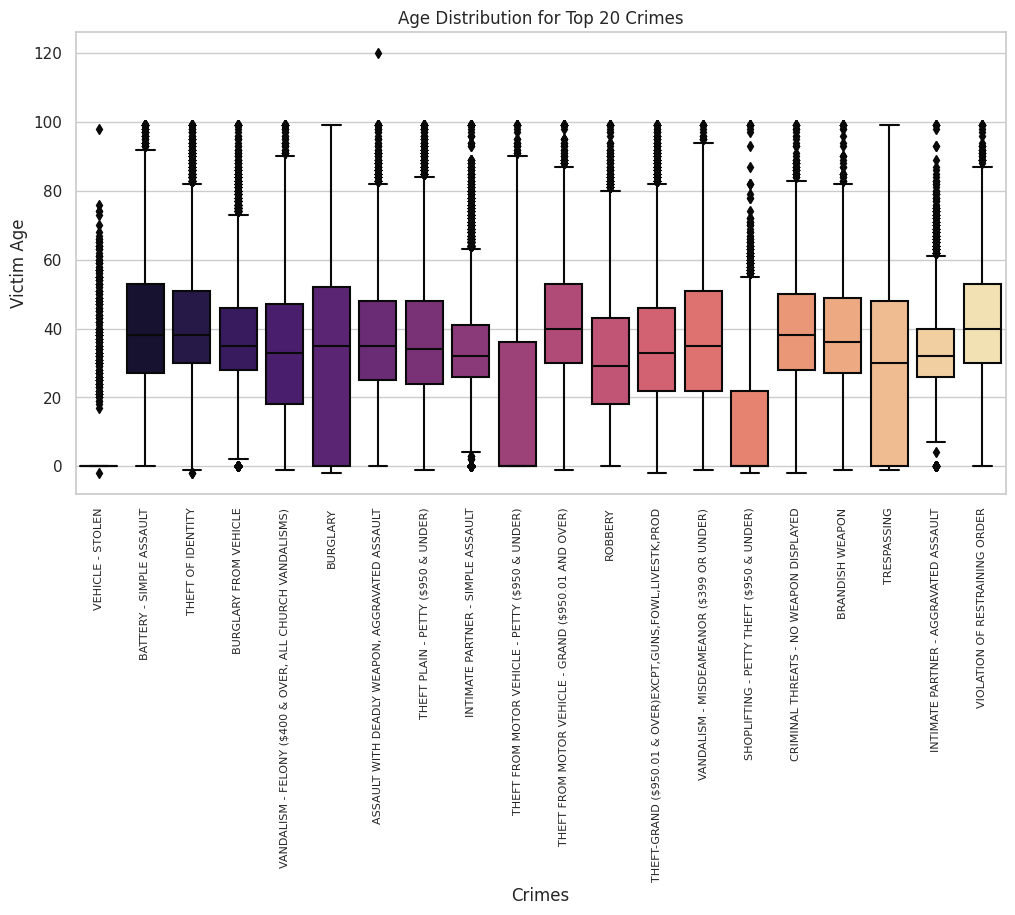

In [118]:
top_20_crimes = data['Crm_Cd_Desc'].value_counts().head(20).index.tolist()
filtered_data = data[data['Crm_Cd_Desc'].isin(top_20_crimes)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Crm_Cd_Desc', y='Vict_Age', data=filtered_data, order=top_20_crimes, palette='magma')
plt.xticks(rotation=90, fontsize=8)
plt.title('Age Distribution for Top 20 Crimes')
plt.xlabel('Crimes')
plt.ylabel('Victim Age')
plt.show()


### **CRIME COUNT DISTRIBUTION FOR ALL AGES**

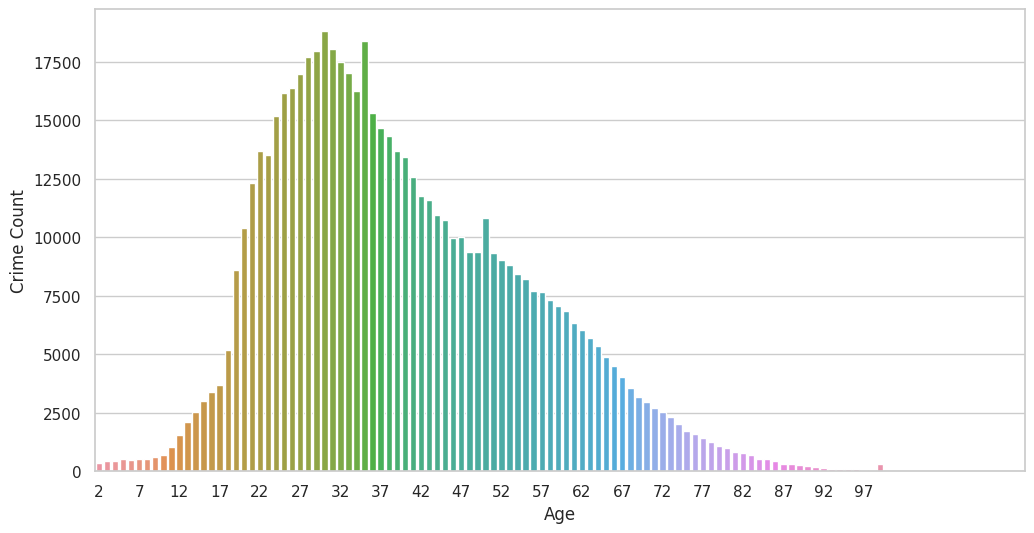

In [174]:
crime_count_by_age = data[data['Vict_Age'] > 0].groupby('Vict_Age').size().reset_index(name='Crime_Count')

plt.figure(figsize=(12,6))
sns.barplot(data=crime_count_by_age, x='Vict_Age', y='Crime_Count')
plt.xlabel('Age')
plt.ylabel('Crime Count')
plt.xticks(range(0, max(crime_count_by_age['Vict_Age']), 5))
plt.title('Crime Count Distribution for all ages')
plt.show()


In [ ]:
corr_age_matrix = data([Vict_Age, ])

### **DISTRIBUTION OF VICTIM DESCENT FOR TOP 10 CRIMES**

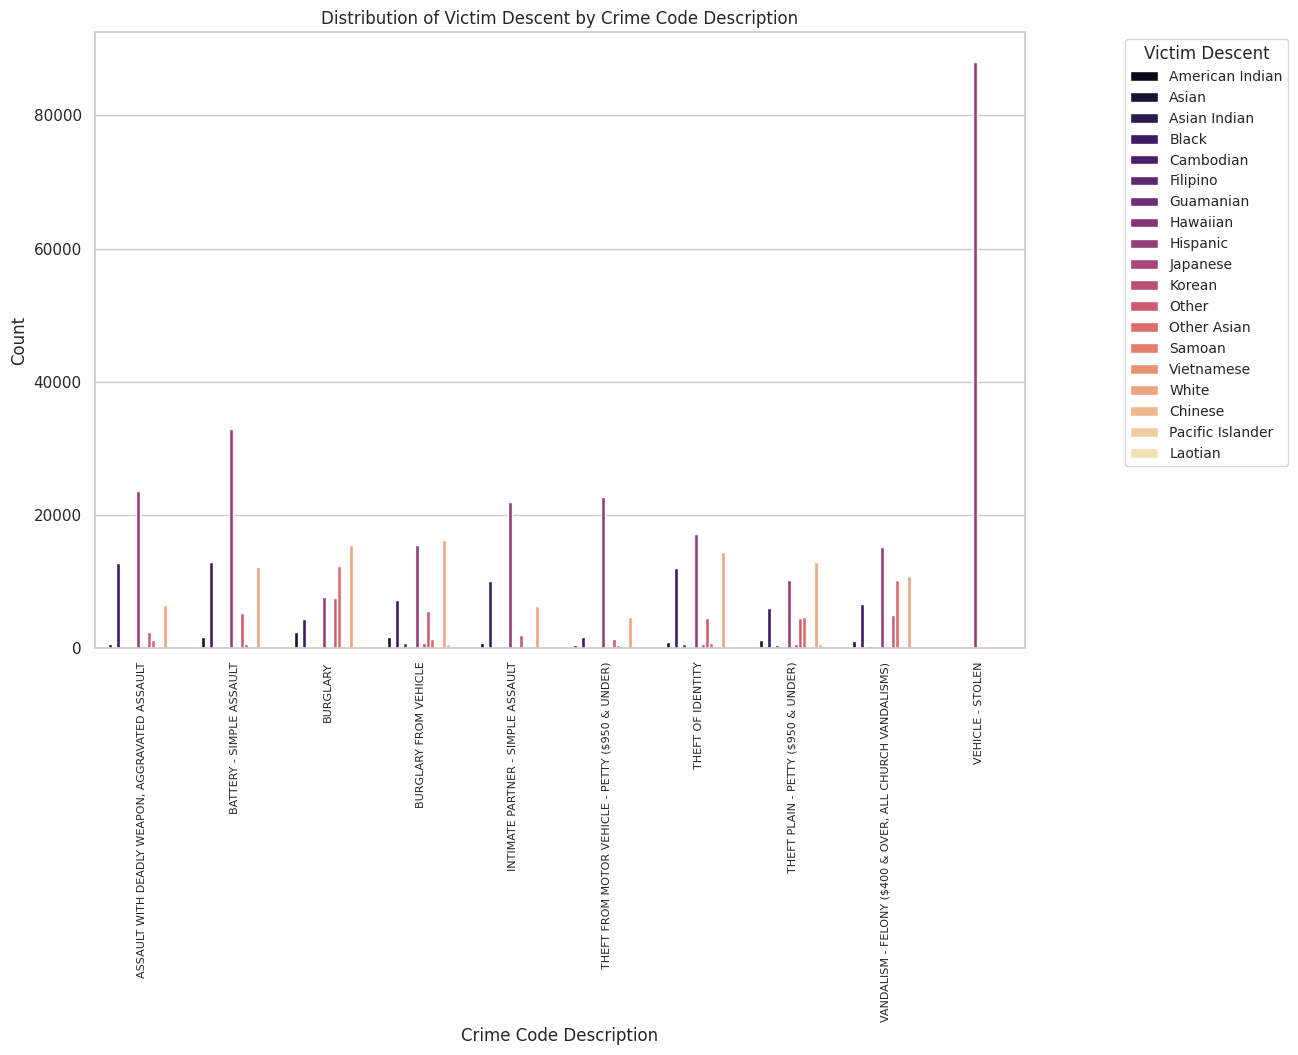

In [209]:
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Other Asian',
    'Z': 'Asian Indian',
}
data['Victim_Descent_Mapped'] = data['Vict_Descent'].map(descent_mapping)

grouped_data = data.groupby(['Crm_Cd_Desc', 'Victim_Descent_Mapped']).size().reset_index(name='Count')
top_10_crime_descriptions = grouped_data.groupby('Crm_Cd_Desc')['Count'].sum().sort_values(ascending=False).head(10).index
filtered_data = grouped_data[grouped_data['Crm_Cd_Desc'].isin(top_10_crime_descriptions)]

plt.figure(figsize=(12,8))
sns.barplot(y='Count', x='Crm_Cd_Desc', hue='Victim_Descent_Mapped' ,data=filtered_data, palette='magma', orient='v')
plt.title('Distribution of Victim Descent by Crime Code Description')
plt.xlabel('Crime Code Description')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Count')
plt.legend(title='Victim Descent', bbox_to_anchor=(1.1, 1), loc='upper left', fontsize='small')
plt.show()


### **Correlation with Economic Factors**

In [148]:
eco_df = pd.DataFrame(economical_data)
eco_df['date'] = pd.to_datetime(eco_df['date'])
eco_df['year_month'] = eco_df['date'].dt.strftime('%Y-%-m')
eco_df.drop('date', axis=1, inplace=True)

eco_df.head()


,GDP,Unemployment_Rate,Inflation_Rate,Avg_Income,Other_Economic,year_month
0,500000,4.5,2.0,55000,1200,2020-1
1,505000,4.3,2.2,55200,1210,2020-2
2,508000,4.7,2.5,54800,1190,2020-3
3,495000,5.0,2.3,54500,1205,2020-4
4,502000,5.2,2.4,56000,1185,2020-5


In [144]:
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])

data['Year'] = data['DATE_OCC'].dt.year
data['Month'] = data['DATE_OCC'].dt.month

monthly_crime_data = data.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')
monthly_crime_data['year_month'] = monthly_crime_data['Year'].astype(str) + '-' + monthly_crime_data['Month'].astype(str)

monthly_crime_data.drop(['Year', 'Month'], axis=1, inplace=True)

monthly_crime_data.head()


,Crime_Count,year_month
0,18477,2020-1
1,17244,2020-2
2,16155,2020-3
3,15673,2020-4
4,17187,2020-5


In [151]:
eco_crime_df = pd.merge(monthly_crime_data, eco_df, on='year_month', how='inner')

eco_crime_df.head()

,Crime_Count,year_month,GDP,Unemployment_Rate,Inflation_Rate,Avg_Income,Other_Economic
0,18477,2020-1,500000,4.5,2.0,55000,1200
1,17244,2020-2,505000,4.3,2.2,55200,1210
2,16155,2020-3,508000,4.7,2.5,54800,1190
3,15673,2020-4,495000,5.0,2.3,54500,1205
4,17187,2020-5,502000,5.2,2.4,56000,1185


<ipython-input-162-a530533dafc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = eco_crime_df.corr()


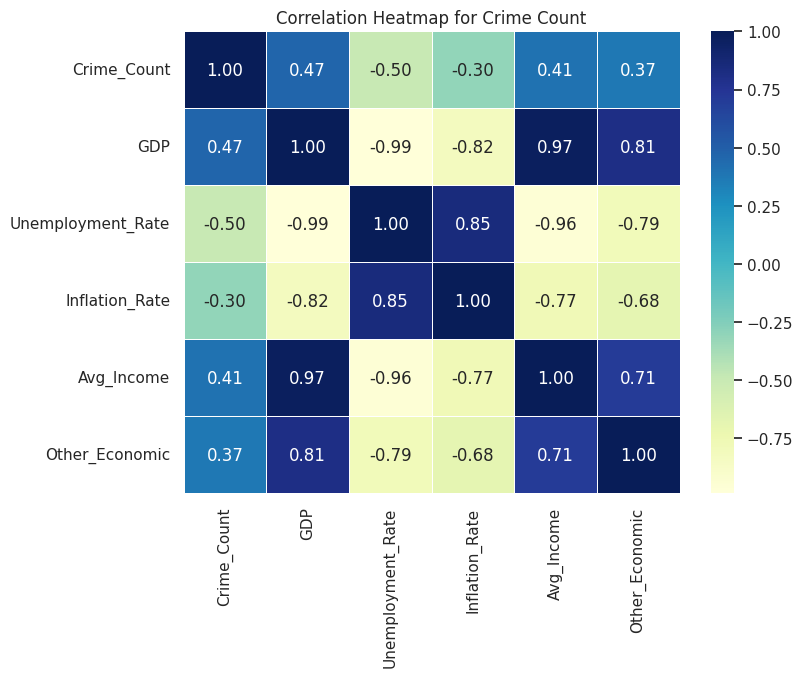

In [162]:
corr_matrix = eco_crime_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidth=0.4, linecolor='white')
plt.title("Correlation Heatmap for Crime Count")

plt.show()


# **Advanced Analysis**

---



### **Forecasted Crime Count using SARIMA (Seasonal AutoRegressive Integrated Moving Average)**

In [ ]:
!pip install pystan==2.19.1.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61973787 sha256=832f38a19ce3f6cb109c42b2c3d5a9b0151ce2ab6747637721027b5fc04550c2
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
!pip install prophet

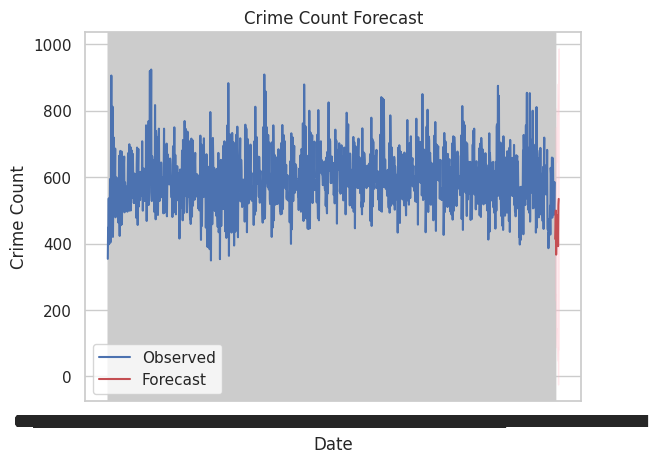

Forecasted Crime Counts:
1392    414.002841
1393    445.100364
1394    499.279559
1395    366.556165
1396    421.741045
1397    476.474522
1398    433.425470
1399    424.475583
1400    484.476305
1401    392.190203
1402    516.306442
1403    534.384657
Name: predicted_mean, dtype: float64


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.core.tools.datetimes import to_datetime

data['YearMonth'] = data['Date_Rptd']
monthly_crime_count = data.groupby('YearMonth').size().reset_index(name='crime_count')

order = (1, 1, 0)
seasonal_order = (1, 1, 0, 12)

model = SARIMAX(monthly_crime_count['crime_count'], order=order, seasonal_order=seasonal_order)

results = model.fit()

forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)

forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.plot(monthly_crime_count['YearMonth'], monthly_crime_count['crime_count'], label='Observed')
plt.plot(forecast_values.index, forecast_values, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.show()

print("Forecasted Crime Counts:")
print(forecast_values.tail(12))


### **CLUSTERING CRIME BASED ON LOCATION**



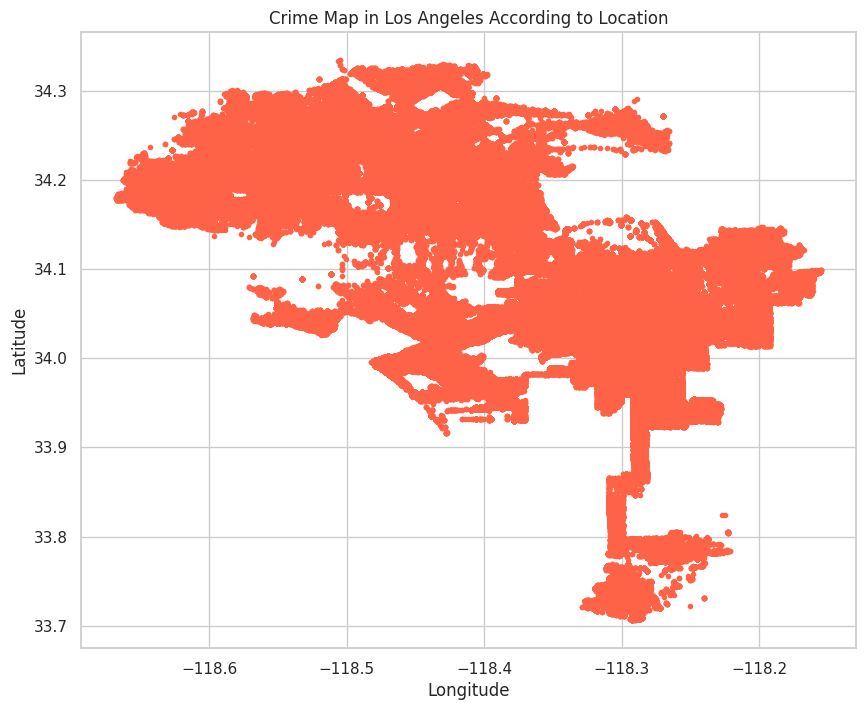

In [237]:
#VISUALIZING THE SCATTER PLOT PRIOR TO CLUSTERING
plt.figure(figsize=(10, 8))
plt.scatter(data['LON'], data['LAT'], c='tomato', marker='.')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Map in Los Angeles According to Location')

plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

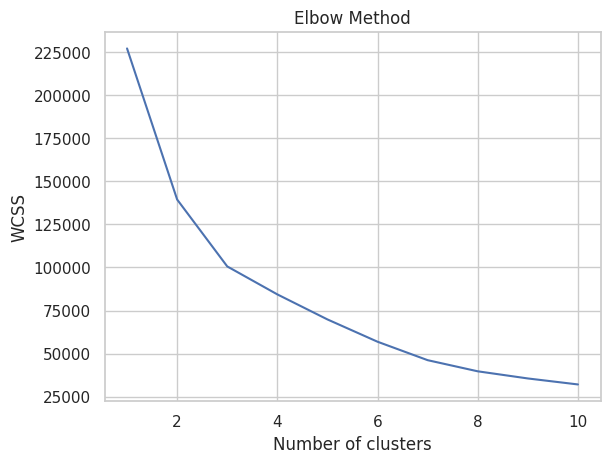

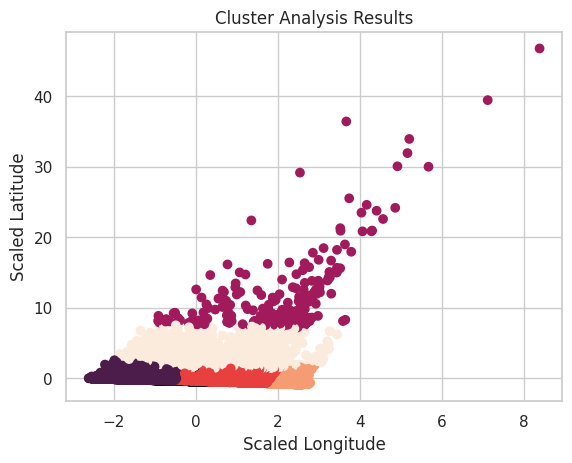

In [241]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

crime_counts_by_location = data.groupby(['LAT', 'LON']).size().reset_index(name='crime_count')

data_for_clustering = crime_counts_by_location[['crime_count', 'LAT', 'LON']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(scaled_data)

crime_counts_by_location['Cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.title('Cluster Analysis Results')
plt.xlabel('Scaled Longitude')
plt.ylabel('Scaled Latitude')
plt.show()

